In [4]:
# imports, add to this as needed

# change to matplotlib notebook for classic view
import GAUtilities as ga
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from scipy.optimize import minimize
import json
from simanneal import Annealer

<body style="background-color:aquamarine;">
   <h3>Hints for 1-3</h3>
</body>
The code for this problem is very similar to the Wyndor Quadratic Program.  The harder part is formulating the objective function and constraints.

# HW7 - Genetic Algorithms

### When asking questions about homework in Piazza please use a tag in the subject line like HW1.3 to refer to Homework 1, Question 3.  So the subject line might be **HW1.3 question**.  Note there are no spaces in "HW1.3".  This really helps keep Piazza easily searchable for everyone!

For full credit, all code in this notebook must be both executed in this notebook and copied to the Canvas quiz where indicated.

## Best Individuals Selection

In the lesson, we showed you tournament selection. Our code for the tournament selection is shown below. 

```python
def tournamentSelection(pop, tourn_size, debug=False):
    #get the population size
    pop_size, ind_size = pop.shape[0], pop.shape[1]

    # initialize selected population
    select_pop = np.zeros((pop_size,ind_size)) 
    for j in range(pop_size):
        subset_pos = np.random.choice(pop_size,tourn_size,replace=False) # select without replacement
        smallest_pos = np.min(subset_pos) # choose index corresponding to lowest fitness
        if debug:
            print('Individuals in tournament:', subset_pos)
            print('Individual selected:', smallest_pos)
        select_pop[j] = pop[smallest_pos]
    return select_pop     
```

Another method of selection is called "**Best Individuals Selection**." In Best Individuals Selection, k number of the best individuals are randomly selected to fill out the population. For instance, if k were 3, your new population would be a random selection of individuals 1, 2, and 3 (0, 1, and 2 in Python).

Write a function below that performs Best Individuals Selection. Your function should take in parameters for the population and k, and should return a population that is the same size as the passed in population. 

**You should use numpy's random integer generator (not random choice) to make the selection for each slot.**

We've provided some starter code. Be sure to execute your function with our provided population, and print out the resulting selected individuals.

### **Question 1** <font color="magenta">(2 points)</font>
    
Which integer makes up the first (index 0) individual after selection? Use $k=3.$

### Provided Code

```python
np.random.seed(51)
def bestIndSelection(pop, k):
    ##########################
    #write your code here
    ##########################

#this population has been presorted by best fitness (minimum sum of genes), so you don't need to sort it.
initPop = np.array(
    [[1,1,1,1,1],
    [2,2,2,2,2],
    [3,3,3,3,3],
    [4,4,4,4,4],
    [5,5,5,5,5],
    [6,6,6,6,6]]).astype(int) 

#Call your function here - don't forget to cast the output to integers

#Print your selected population
```

### Solution:

## Two-Point Crossover 

In the lesson we described One-Point Crossover. Our code for One-Point Crossover is shown below.

```python
def onePointCrossover(pop, cx_prob, debug=False):
    #get the sizes from pop
    pop_size, ind_size = pop.shape[0], pop.shape[1]
    cx_pop = np.zeros((pop_size,ind_size)) # initialize crossover population
    for j in range(int(pop_size/2)):  # pop_size must be even
        parent1, parent2 = pop[2*j], pop[2*j+1]
        child1, child2 = parent1.copy(), parent2.copy()
        if np.random.uniform() < cx_prob: # crossover occurs
            cx_point = np.random.randint(1,ind_size) # crossover point between 1 and ind_size-1
            if debug:
                print('Crossover happened between Individuals', 2*j, 'and', 2*j+1, 'at point', cx_point)
            child1[0:cx_point], child2[0:cx_point] = parent2[0:cx_point], parent1[0:cx_point]
        cx_pop[2*j] = child1
        cx_pop[2*j+1] = child2
    return cx_pop
```

Another common form of crossover that works for integer, binary, and real numbers is Two-Point Crossover. In Two Point Crossover, two points are chosen, and the values in between those two points are swapped between the parents. Visually, it looks like this:

<img src="./images/TwoPointCrossover.png" width=226>

From a code perspective, we're just changing the set starting point from 0 in each child/parent cross to the first of our two generated random points.

Complete the function below for Two Point Crossover. You only need to change the code in between the two lines of hash tags. Run the code.


   
### **Question 2** <font color="magenta">(2 points)</font> 

Multiple Choice (select all that apply):
Which pairs of individuals mated?


* 0 and 1
* 1 and 2
* 2 and 3
* 3 and 4
* 4 and 5


### **Question 3** <font color="magenta">(2 points)</font> 
Multiple Choice (select all that apply):
Which genes are in individual 5 (the last individual)?

* 1
* 2
* 3
* 4
* 5
* 6



## Provided Code

```python
np.random.seed(52)
def twoPointCrossover(pop, cx_prob, debug=False):
    #get the sizes from pop
    pop_size, ind_size = pop.shape[0], pop.shape[1]
    cx_pop = np.zeros((pop_size,ind_size)) # initialize crossover population
    for j in range(int(pop_size/2)):  # pop_size must be even
        parent1, parent2 = pop[2*j], pop[2*j+1]
        child1, child2 = parent1.copy(), parent2.copy()
        if np.random.uniform() < cx_prob: # crossover occurs  
            cx_points = [0,0]
            while cx_points[0] == cx_points[1]: # generate pairs until they're different
                cx_points = np.sort(np.random.randint(1,ind_size, 2) ) # crossover points between 1 and ind_size-1
            ###################################
            # Your code goes here
            ###################################
            #sort the crossover points
            
            #adapt the one point crossover line to use your two randomly generated points
            
            ########################################
            # do not change anything after this
            ########################################
            
        cx_pop[2*j] = child1
        cx_pop[2*j+1] = child2
    return cx_pop


#generate the initial population
initPop = np.array(
    [[1,1,1,1,1,1,1],
    [2,2,2,2,2,2,2],
    [3,3,3,3,3,3,3],
    [4,4,4,4,4,4,4],
    [5,5,5,5,5,5,5],
    [6,6,6,6,6,6,6]]
                  ).astype(int) 

cx_prob=.8
twoPointCrossover(initPop, cx_prob, debug=True).astype(int)
```

### Solution:

# Boundary Mutation
In the lesson we described several mutation algorithms that are used with real or integer variables and include bounds. Here's an example of the code for one of them, the uniform integer mutation. Study this code to understand how mutation is happening.

```python
def uniformIntMutation(pop, mut_prob, ind_prob, bounds, debug=False):
    mut_pop = pop.copy()
    pop_size, ind_size = pop.shape[0], pop.shape[1]
    for j in range(pop_size):
        if np.random.uniform()<mut_prob:
            new_assign = mut_pop[j].copy()
            for i in range(ind_size):
                if np.random.uniform() < ind_prob:
                    if debug:
                        print('Gene', i, 'in Individual', j, 'mutated.')
                    while new_assign[i] == mut_pop[j][i]: # loops until new and old are different
                        new_assign[i] = np.random.randint(bounds[0], bounds[1])                     
            mut_pop[j] = new_assign
    return mut_pop.astype(int)
```

Another simple mutation algorithm is the **Boundary mutation**. In the boundary mutation, if both the mut_prob and ind_prob is met, the gene is replaced with either the upper or lower bound, chosen randomly. There are several coding approaches you could take to randomly select between lower and upper. We'd like you to use **numpy's random choice function**. 

Use the starter code we've provided to finish this function. Make sure to loop until the new and old are different.

### **Question 4** <font color="magenta">(2 points)</font>
How many genes mutated?

### **Question 5** <font color="magenta">(2 points)</font>
How many individuals mutated?

### **Question 6** <font color="magenta">(2 points)</font>
The objective function for this problem is to minimize the sum of the genes in each individual.
    
How many mutations resulted in an improvement in the gene?

## Provided Code

```python
np.random.seed(53)
def boundaryMutation(pop, mut_prob, ind_prob, bounds, debug=False):
    mut_pop = pop.copy()
    pop_size, ind_size = pop.shape[0], pop.shape[1]
    for j in range(pop_size):
        if np.random.uniform()<mut_prob:
            new_assign = mut_pop[j].copy()
            for i in range(ind_size):
                if np.random.uniform() < ind_prob:
                    if debug:
                        print('Gene', i, 'in Individual', j, 'mutated.')                
                    while new_assign[i] == mut_pop[j][i]: # loops until new and old are different
                        ###########################################
                        #modify this line
                        new_assign[i] =   
                        ##########################################
            mut_pop[j] = new_assign
    return mut_pop.astype(int)

#generate the initial population
initPop = np.array(
    [[1,1,1,1,1,1,1],
    [2,2,2,2,2,2,2],
    [3,3,3,3,3,3,3],
    [4,4,4,4,4,4,4],
    [5,5,5,5,5,5,5],
    [6,6,6,6,6,6,6]]
                  ).astype(int) 

mut_prob=.4
ind_prob=.2
bounds = [1,6]
boundaryMutation(initPop, mut_prob, ind_prob, bounds, debug=True).astype(int)
```

### Solution:


# The Traveling Salesperson Problem

In a previous lesson we saw how to use local search to seek solutions to the TSP problem with 48 cities.  In this homework problem you'll use the genetic algorithm to search for solutions.  The json file Caps48.json in the data folder has both the distance matrix and the optimal tour.  Your goal is to identify tours with total distance under 19,000 kilometers.

The following cell shows you how to visualize a tour of the 48 cities (and reminds you how to use the json file).  You should plot your solutions to see if they seem reasonable.  A good solution will avoid long detours and shouldn't intersect itself.  We plot the best possible solution here:

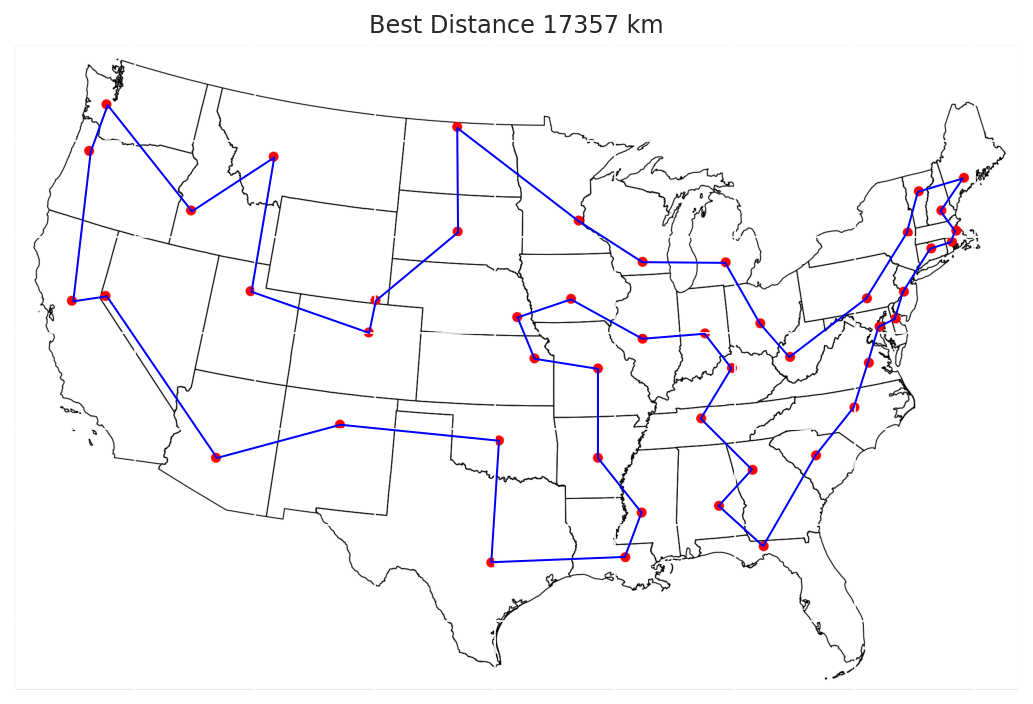

In [5]:
with open("data/Caps48.json", "r") as tsp_data:
    tsp = json.load(tsp_data)
distance_matrix = tsp["DistanceMatrix"]
optimal_tour = tsp["OptTour"]
opt_dist = tsp["OptDistance"]/1000 # converted to kilometers
xy = np.array(tsp["Coordinates"])

def plot_tour(best_tour, xy_meters, best_dist, height, width):

    meters_to_pxl = 0.0004374627441064968
    intercept_x = 2.464
    intercept_y = 1342.546
    xy_pixels = np.zeros(xy_meters.shape)
    xy_pixels[:,0] = meters_to_pxl * xy_meters[:,0] + intercept_x
    xy_pixels[:,1] = -meters_to_pxl * xy_meters[:,1] + intercept_y

    fig, ax = plt.subplots(1, 1, figsize=(height, width))
    im = plt.imread('images/caps48.png')
    implot = ax.imshow(im)
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(axis='both', which='both', length=0)

    loop_tour = np.append(best_tour, best_tour[0])
    ax.plot(xy_pixels[loop_tour, 0],
            xy_pixels[loop_tour, 1],
            c='b',
            linewidth=1,
            linestyle='-')
    plt.title('Best Distance {:d} km'.format(int(best_dist)))

# this is an example of how to plot a tour
plot_tour(optimal_tour, xy, opt_dist, 9, 6)

Now we'll use the Genetic Algorithm to search for a tour with total distance less than 19,000 km. (You may or may not find one.)

We'll implement this two ways - once by searching without elitism and once by searching with elitism. For each approach you will:

* Initialize the population with permuations
* Use the Tournament selection operator described in the lesson (just load GAUtilities.py as we did in the lesson)
* Use the Ordered Crossover operator described in the lesson.
* Use the Flip Segments Mutation described in the lesson.
* Include a plot of your tour to aid in your understanding.

## **Question 7: TSP Option 1** - Manually graded <font color="magenta">(4 points)</font>

Enter your code to solve the traveling salesperson problem for option 1. 

* Do not use elitism.
* Use the parameters we have provided below.

**Note: You may change the population size and number of iterations to a small number while developing your code. But be sure to change them back before answering the questions.**

## Provided Code

```python
np.random.seed(54)
tourn_size = 3 #number of individuals to use in each tournament
pop_size = 1000 # should be even due to the way we'll implement crossover
ind_size = 48 # determines number of input variables for Rastrigin and each individual
cx_prob = 0.8 # probability a pair of parents crossover to produce two children
mut_prob = .2 #probability an individual mutates
ind_prob = .1 #probability each variable in an individual mutates
num_iter = 300 # number of genetic algorithm mutations
update_iter = 100 # how often to display output

def obj_tour_distance(individual, dist_mat):
    distance = dist_mat[individual[-1]][individual[0]]
    for gene1, gene2 in zip(individual[0:-1], individual[1:]):
        distance += dist_mat[gene1][gene2]
    return distance/1000

# load data (this may have to be adapted for different problems)
with open("data/Caps48.json", "r") as tsp_data:
    tsp = json.load(tsp_data)
distance_matrix = tsp["DistanceMatrix"]

###################
# Your code starts here
###################
```

### Solution:

## **Question 8** <font color="magenta">(2 points)</font>

What was the shortest tour you found? Enter the number in kilometers.

## **Question 9** <font color="magenta">(2 points)</font>
Which city did the tour end in?

* 31
* 42
* 3
* 46
* 29

## **Question 10: TSP Option 2** (Manually Graded) <font color="magenta">(4 points)</font>

Rerun the Traveling salesperson problem. This time:

* Implement elitism.
* Use the parameters below.

## Provided Code

```python
np.random.seed(54)
num_elite = 50 # should be not more than about 5% of pop_size
pop_size = 1000 # should be even due to the way we'll implement crossover
ind_size = 48 # determines number of input variables for Rastrigin and each individual
tourn_size = 3 # tournament size for selection
cx_prob = 0.8 # probability a pair of parents crossover to produce two children
mut_prob = .1 #0.1 # probability an individual mutates
ind_prob = .05 #0.05 # probability each variable in an individual mutates
num_iter = 300 # number of genetic algorithm iterations
update_iter = 100 # how often to display output

def obj_tour_distance(individual, dist_mat):
    distance = dist_mat[individual[-1]][individual[0]]
    for gene1, gene2 in zip(individual[0:-1], individual[1:]):
        distance += dist_mat[gene1][gene2]
    return distance/1000

# load data (this may have to be adapted for different problems)
with open("data/Caps48.json", "r") as tsp_data:
    tsp = json.load(tsp_data)
distance_matrix = tsp["DistanceMatrix"]

##############
# your code starts here
##############
```

### Solution:

 ## **Question 11** <font color="magenta">(2 points)</font>

What was the shortest tour you found? Enter the number in kilometers.

## **Question 12** <font color="magenta">(2 points)</font>
Which city did the tour start in?

* 27
* 19
* 17
* 20
* 12

## **Question 13** <font color="magenta">(2 points)</font>

In which TSP approach/option are we allowing for more exploration?

* Option 1
* Option 2
* They have the same amount of exploration.

## **Question 14** <font color="magenta">(2 points)</font>
In which TSP approach/option are we allowing for more exploitation?
* Option 1
* Option 2
* They have the same amount of exploitation.

# The Knapsack Problem

We first encountered this problem in the Lesson 4 Homework.

The knapsack problem is a classical combinatorial optimization problem that will be good for practicing with the ideas of discrete local search and multistart.  Given a set of items, each with a weight and a value, determine which items to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible.  In the 0-1 version of the knapsack problem, the decision variables are binary (or boolean) and represent whether to include each item in the collection.  We'll start with 20 items. You need to determine the collection of items that maximizes the value and keeps the total weight no more than 50 (that is $\leq 50$).

We'll use a **soft constraint** because its possible to find a solution that doesn't satisfy the constraint.  Soft constraints are implemented by including a penalty in the objective function when the proposed solution doesn't satisfy the constraint.  We'll give you the following starter code for the objective function with a soft constraint.

```python
def obj_knapsack(x, values, weights, max_tot_weight):
    # x is a vector of booleans of which items to include
    tot_value = sum(values[x])
    penalty = sum(values)*min( max_tot_weight - sum(weights[x]), 0) 
    return tot_value+penalty
```

The penalty here is negative when the total weight is too large so that the optimizer knows it hasn't found a good maximizing solution.

Our genetic algorithm always minimizes, so you'll need to alter this objective function. Run the code below.



In [3]:
# generate random weights and values for a knapsack problem
# DO NOT CHANGE ANYTHING in this cell
import numpy as np
num_items = 20
np.random.seed(seed=123) 
values = np.random.randint(low=5, high=50, size=num_items)
weights = np.random.randint(low=1, high=10, size=num_items)
max_weight = 50

np.random.seed(seed=125)
sample_x = np.random.choice([False,True], size=num_items)
np.random.seed() # use system clock to reset the seed so future random numbers will appear random

## Question 15 <font color="magenta">(2 points)</font>
Given the sample_x, values and weights above what is the current fitness of the knapsack, using your **altered** objective function that includes the penalized objective?  Hint:  your answer should be positive, also you can simply pass sample_x to your new objective function, you don't need to use ga.ComputeFitness or similar.

## Question 16 (Manually Graded) <font color="magenta">(6 points)</font>

Given the following set up, run the genetic algorithm **without elitism** to solve the knapsack problem.

Use the following:
* One Point Crossover for mating
* Bit flipping for mutation

## Provided Code

```python
### DO NOT CHANGE ANYTHING in this block of code

import numpy as np
pop_size = 200 # should be even due to the way we'll implement crossover
ind_size = 20 # determines number of input variables for Rastrigin and each individual
tourn_size = 3 # tournament size for selection
cx_prob = 0.8 # probability a pair of parents crossover to produce two children
mut_prob = 0.2 # probability an individual mutates
ind_prob = 0.1 # probability each variable in an individual mutates
num_iter = 100 # number of genetic algorithm mutations
update_iter = 10 # how often to display output

np.random.seed(seed=123)
num_items = 20
values = np.random.randint(low=5, high=50, size=num_items)
weights = np.random.randint(low=1, high=10, size=num_items)
max_weight = 50
np.random.seed() # use system clock to reset the seed so future random numbers will appear random
###

################
#Your code Starts here
################
```

### Solution:

# The 10-dimensional Rastrigin Function with Local Search 

## Question 17 (Manually Graded) <font color="magenta">(6 points)</font>

The Rastrigin function was first explored in Lesson 4 and is very similar in implementation to the sphere function demonstrated in Lesson 7.  Here is the definition of the function:

In [39]:
# rastrigin definition
def obj_rastrigin(x):
    global func_count
    func_count += 1
    x = np.array(x) # force a numpy arrray here so that the math below works
    # pass a single vector of length n (=dim) to evaluate Rastrigin
    return sum(x**2 + 10 - 10 * np.cos(2 * np.pi * x))

This function can be applied to an `x` that is any iterable of any length.  We'll be working with numpy arrays.  For the 10 dimensional problems your numpy array should be a vector with 10 floating point numbers.  We'll enforce bounds that $-5.12 \leq x_i \leq 5.12$ so all of the entries in $x$ should be between those bounds.  

You can try whichever crossover and mutation functions that you think would be appropriate, and adjust any hyperparameters you want to adjust. You may also use elitism if you want. 

You **must** add local search using `scipy.optimize.minimize`.

To add local search to the genetic algorithm, just inside the beginning of your loop you will:
* sort pop by increasing fitness
* take the first three individuals with the lowest fitness and replace them by the minimizing location resulting from using scipy.optimize.minimize with bounds applied to each individual
    * replace both the fitness values and the individuals in the population with their optimized values
* after the local searches sort the population again in case the order has changed

Your goal is to find the global minimimum at (0,0,0,...) where the function value is also zero. You might not reach that goal, but you should play with hyperparameters until you get close. (We regularly got 8 or 9 variables at 0 and an $f(x) < 1$. 

We do not provide any starter code for this problem.

## Question 18 (Manually Graded) <font color="magenta">(4 points)</font>

Briefly discuss what you did in terms of tuning the hyperparameters for the 10-dimensional Rastrigin function. Explain why you made the choices you did and what the relationship of the hyperparameters are to exploration and exploitation.